# Analiza letalskih nesreč

## Uvozimo podatke

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
letalske_nesrece = pd.read_csv('rezultati.csv', na_values=["Ni podatka", "UK"])

## Analiza

### Tabela vseh nesreč

In [112]:
meseci = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12, 'Ni podatka': 13
}
letalske_nesrece['mesec_stevilka'] = letalske_nesrece['mesec'].map(meseci)
letalske_nesrece = letalske_nesrece.sort_values(by=['leto', 'mesec_stevilka'])
letalske_nesrece = letalske_nesrece.reset_index(drop=True)

In [113]:
letalske_nesrece

,mesec,leto,model_letala,operater,starost_letala,smrtne_zrtve,posadka,razmerje_prezivelih,skoda_letala,vrsta_nesrece,faza_leta,narava_leta,kraj_nesrece,drzava_nesrece,odhodno_letalisce,ciljno_letalisce,mesec_stevilka
0,August,1919,Caproni Ca.48,Caproni,0.0,14.0,14.0,0.0,Destroyed & written off,Accident,En route,Passenger,Verona,Italy,Venice-Marco Polo Airport VCE/LIPZ,Milano-Taliedo Airport,8.0
1,August,1919,Felixstowe Fury,Royal Air Force - RAF,1.0,1.0,7.0,86.0,Destroyed & written off,Accident,Initial climb,Military,Felixtowe RNAS,United Kingdom,Felixstowe RNAS,Felixstowe RNAS,8.0
2,February,1920,Handley Page O/7,Handley Page Transport,1.0,0.0,10.0,100.0,Destroyed & written off,Accident,En route,Passenger - Scheduled,Acadia Siding,South Africa,NaN,NaN,2.0
3,February,1920,Handley Page O/400,Handley Page Transport,NaN,0.0,4.0,100.0,Destroyed & written off,Accident,NaN,NaN,El Shereik,Sudan,Aswan Airport ASW/HESN,Khartoum-Civil Airport KRT/HSSS,2.0
4,June,1920,Handley Page O/400,Handley Page Transport,1.0,0.0,2.0,100.0,Destroyed & written off,Accident,En route,Demo/Airshow/Display,Östanå,Sweden,Stockholm unknown airport,Kjeller Air Base ENKJ,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26578,December,2024,Cessna 560 Citation V Ultra,International Aviation Sales LTD opb Phoenix G...,26.0,0.0,2.0,100.0,Substantial,Accident,Taxi,Ferry/positioning,Hartsfield–Jackson Atlanta International Airport,United States of America,Atlanta Hartsfield-Jackson International Airpo...,Tampa International Airport FL TPA/KTPA,12.0
26579,December,2024,Boeing 737-4Y0 SF,Allied Air,31.0,0.0,6.0,100.0,Substantial,Accident,Landing,Ferry/positioning,Abuja-Nnamdi Azikiwe International Airport,Nigeria,Lagos-Murtala Muhammed International Airport L...,Abuja-Nnamdi Azikiwe International Airport ABV...,12.0
26580,December,2024,Embraer ERJ-145EP,Loganair,NaN,0.0,23.0,100.0,NaN,Accident,Initial climb,Passenger - Scheduled,Edinburgh Airport,United Kingdom,Edinburgh-Turnhouse Airport EDI/EGPH,Southampton-Eastleigh Airport SOU/EGHI,12.0
26581,December,2024,Antonov An-2R,Mobil Avia,NaN,0.0,8.0,100.0,Substantial,Accident,Approach,Passenger - Non-Scheduled/charter/Air Taxi,Tambey Airstrip,Russia,Yamburg Airport USMQ,Tambey Airstrip,12.0


In [123]:
model_letala = letalske_nesrece['model_letala'].dropna().value_counts().head(10)

<Axes: >

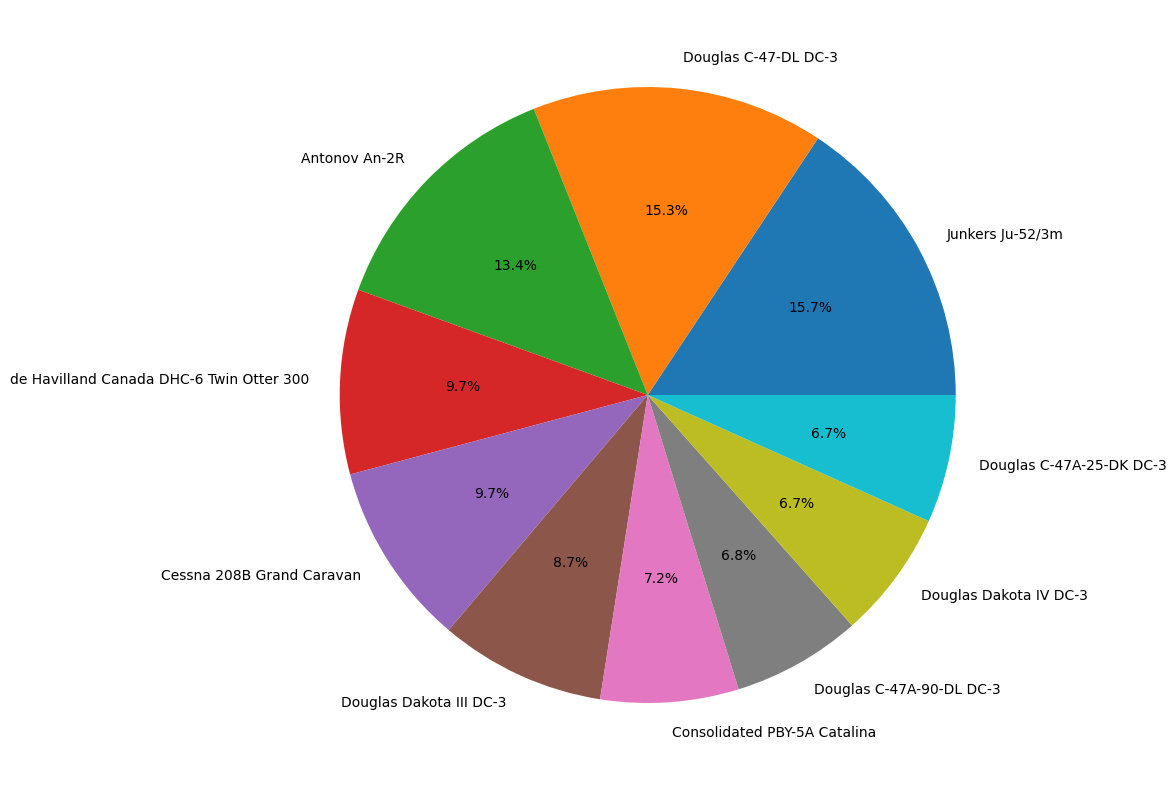

In [124]:
model_letala.plot.pie(autopct='%1.1f%%', figsize=(10, 10), ylabel='')


### Število letalskih nesreč na leto

In [58]:
letno_stevilo_nesrec = letalske_nesrece.groupby('leto').size().reset_index(name='letno_stevilo_nesrec')
stevilo_nesrec_padajoce = letno_stevilo_nesrec.sort_values(by='letno_stevilo_nesrec', ascending = False)

In [125]:
top10_let = stevilo_nesrec_padajoce.head(10)['leto']
podatki_za_top10 = letalske_nesrece[letalske_nesrece['leto'].isin(top10_let)]
podatki_za_top10 = podatki_za_top10.dropna()
podatki_narava_leta = podatki_za_top10.groupby(by=['leto', 'narava_leta']).size().reset_index(name='stevilo_nesrec')
najvec_narava_leta = podatki_narava_leta.groupby('leto')['stevilo_nesrec'].idxmax()
narava_leta_za_top10 = podatki_narava_leta.loc[najvec_narava_leta].reset_index(drop=True)

In [126]:
narava_leta_za_top10

,leto,narava_leta,stevilo_nesrec
0,1942,Military,18
1,1943,Military,52
2,1944,Military,131
3,1945,Military,107
4,1946,Passenger - Scheduled,36
5,1969,Passenger - Scheduled,52
6,1970,Passenger - Scheduled,43
7,1972,Passenger - Scheduled,52
8,1997,Passenger - Scheduled,65
9,1999,Passenger - Scheduled,64


In [59]:
stevilo_nesrec_padajoce

,leto,letno_stevilo_nesrec
25,1944,1508
26,1945,1448
24,1943,772
50,1969,396
23,1942,391
...,...,...
5,1924,3
3,1922,3
6,1925,2
8,1927,2


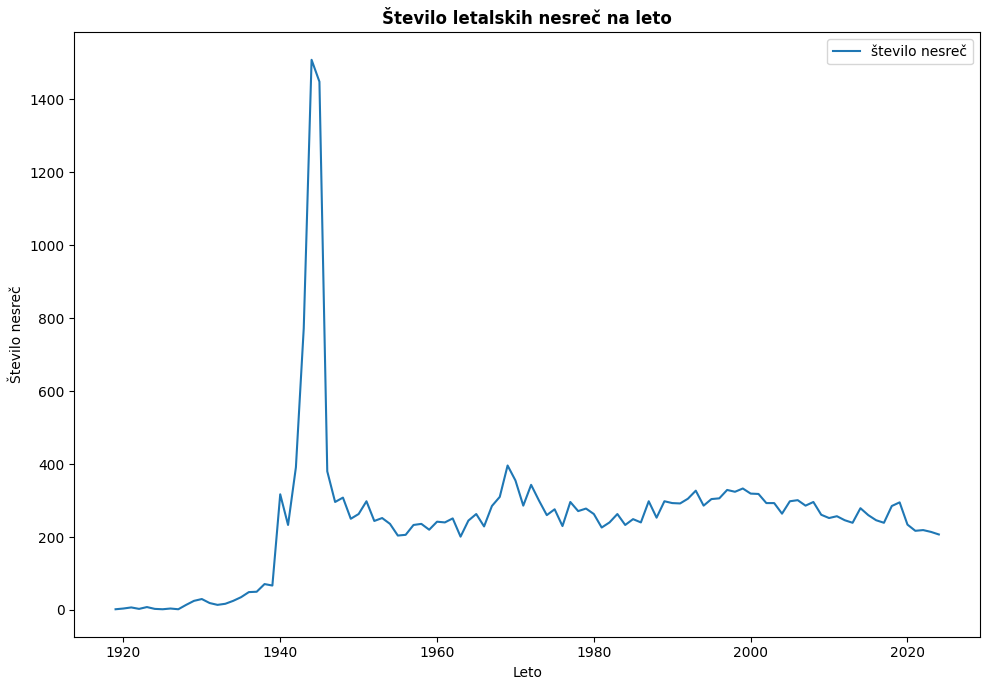

In [89]:
g1 = letno_stevilo_nesrec.plot.line(x='leto', y='letno_stevilo_nesrec', figsize=(10,7))
plt.xlabel('Leto')
plt.ylabel('Število nesreč')
plt.title('Število letalskih nesreč na leto', fontweight='bold')
g1.legend(['število nesreč'])
plt.tight_layout()

In [ ]:
stevilo_nesrec_padajoce

In [62]:
stevilo_leto_drzava = letalske_nesrece.dropna(subset=['drzava_nesrece'])
stevilo_leto_drzava = letalske_nesrece.groupby(['leto', 'drzava_nesrece']).size().reset_index(name='stevilo_nesrec')
najvec_drzava = stevilo_leto_drzava.groupby('leto')['stevilo_nesrec'].idxmax()
nesrece_leto_drzava = stevilo_leto_drzava.loc[najvec_drzava].reset_index(drop=True).sort_values(by='stevilo_nesrec', ascending=False)

In [63]:
nesrece_leto_drzava

,leto,drzava_nesrece,stevilo_nesrec
25,1944,United States of America,180
21,1940,Netherlands,178
24,1943,United States of America,172
26,1945,China,164
84,2003,United States of America,105
...,...,...,...
3,1922,France,2
1,1920,South Africa,1
0,1919,Italy,1
6,1925,France,1


### Delež nesreč po fazi leta ob nesreči

In [64]:
faze = letalske_nesrece['faza_leta'].dropna().value_counts()

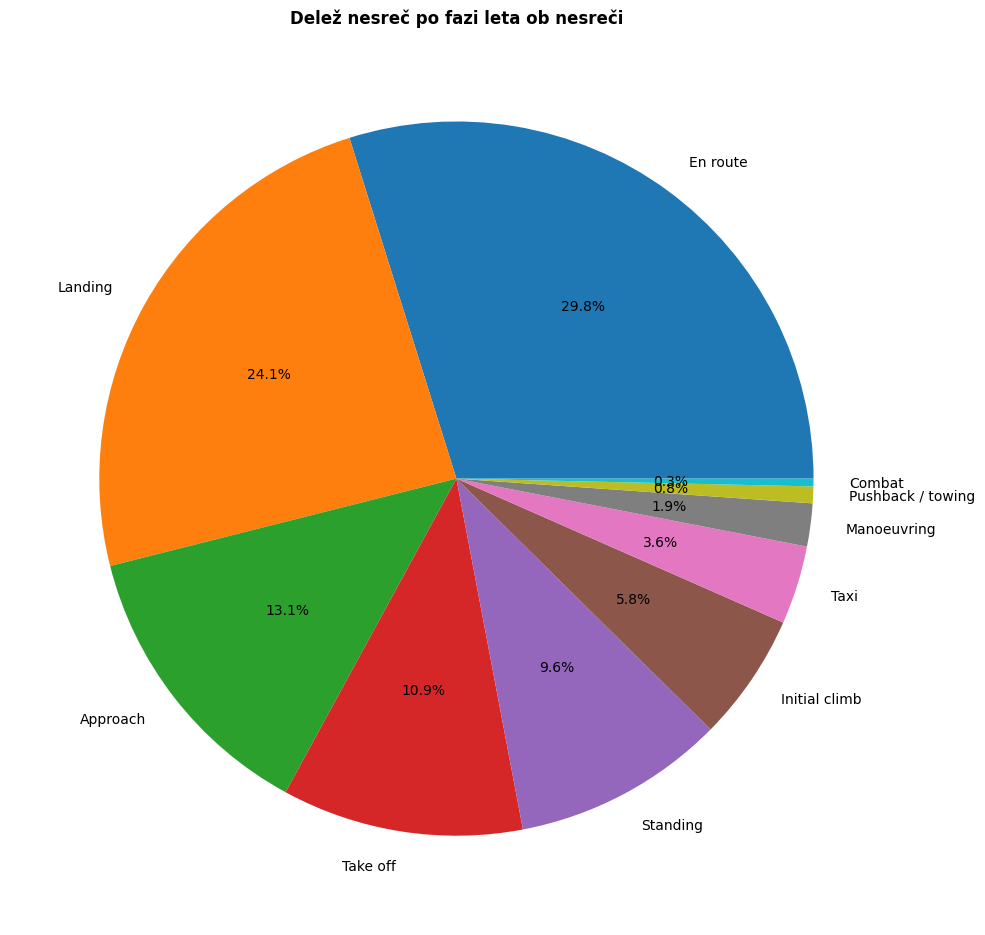

In [90]:
faze.plot.pie(autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title("Delež nesreč po fazi leta ob nesreči", fontweight='bold');
plt.tight_layout()